In [1]:
import csv
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from scipy.special import comb

In [2]:
data=[]
with open('MDS_Assignment1_groceries.csv', newline='') as file:
    rows = csv.reader(file)
    for row in rows:
        items={}
        for item in row:
            items.update({ item:1 })
        data.append(items)

In [3]:
df = pd.DataFrame(data).fillna(0)

In [4]:
df

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9832,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
for col in df.columns:
    if df[col].sum() <10:
        df= df.drop(columns=col)

In [6]:
df = df.astype(bool)

In [7]:
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)

In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[ rules['confidence'] >= 0.15]

In [9]:
rules_sort = rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False)

In [10]:
rules_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
994,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
995,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1004,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
1005,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
625,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
...,...,...,...,...,...,...,...,...,...
29214,"(pip fruit, napkins)",(sausage),0.006711,0.093950,0.001017,0.151515,1.612718,0.000386,1.067844
14587,"(hygiene articles, tropical fruit)",(shopping bags),0.006711,0.098526,0.001017,0.151515,1.537824,0.000356,1.062452
19511,"(yogurt, ham)",(shopping bags),0.006711,0.098526,0.001017,0.151515,1.537824,0.000356,1.062452
29304,"(pip fruit, napkins)",(shopping bags),0.006711,0.098526,0.001017,0.151515,1.537824,0.000356,1.062452


In [11]:
rules_vis = rules_sort.head(100).reset_index(drop=True)

In [32]:
d = {'antecedents': [], 'consequents': []}
df_vis = pd.DataFrame(d)

for i in range(len(rules_vis)):
    A = ""
    for j in rules_vis.iloc[i]['antecedents']:
        A = A + ",\n " + j
    C = ""
    for k in rules_vis.iloc[i]['consequents']:
        C = C + ",\n " + k
    df_vis = df_vis.append({'antecedents': A[3:] , 'consequents': C[3:]}, ignore_index=True)

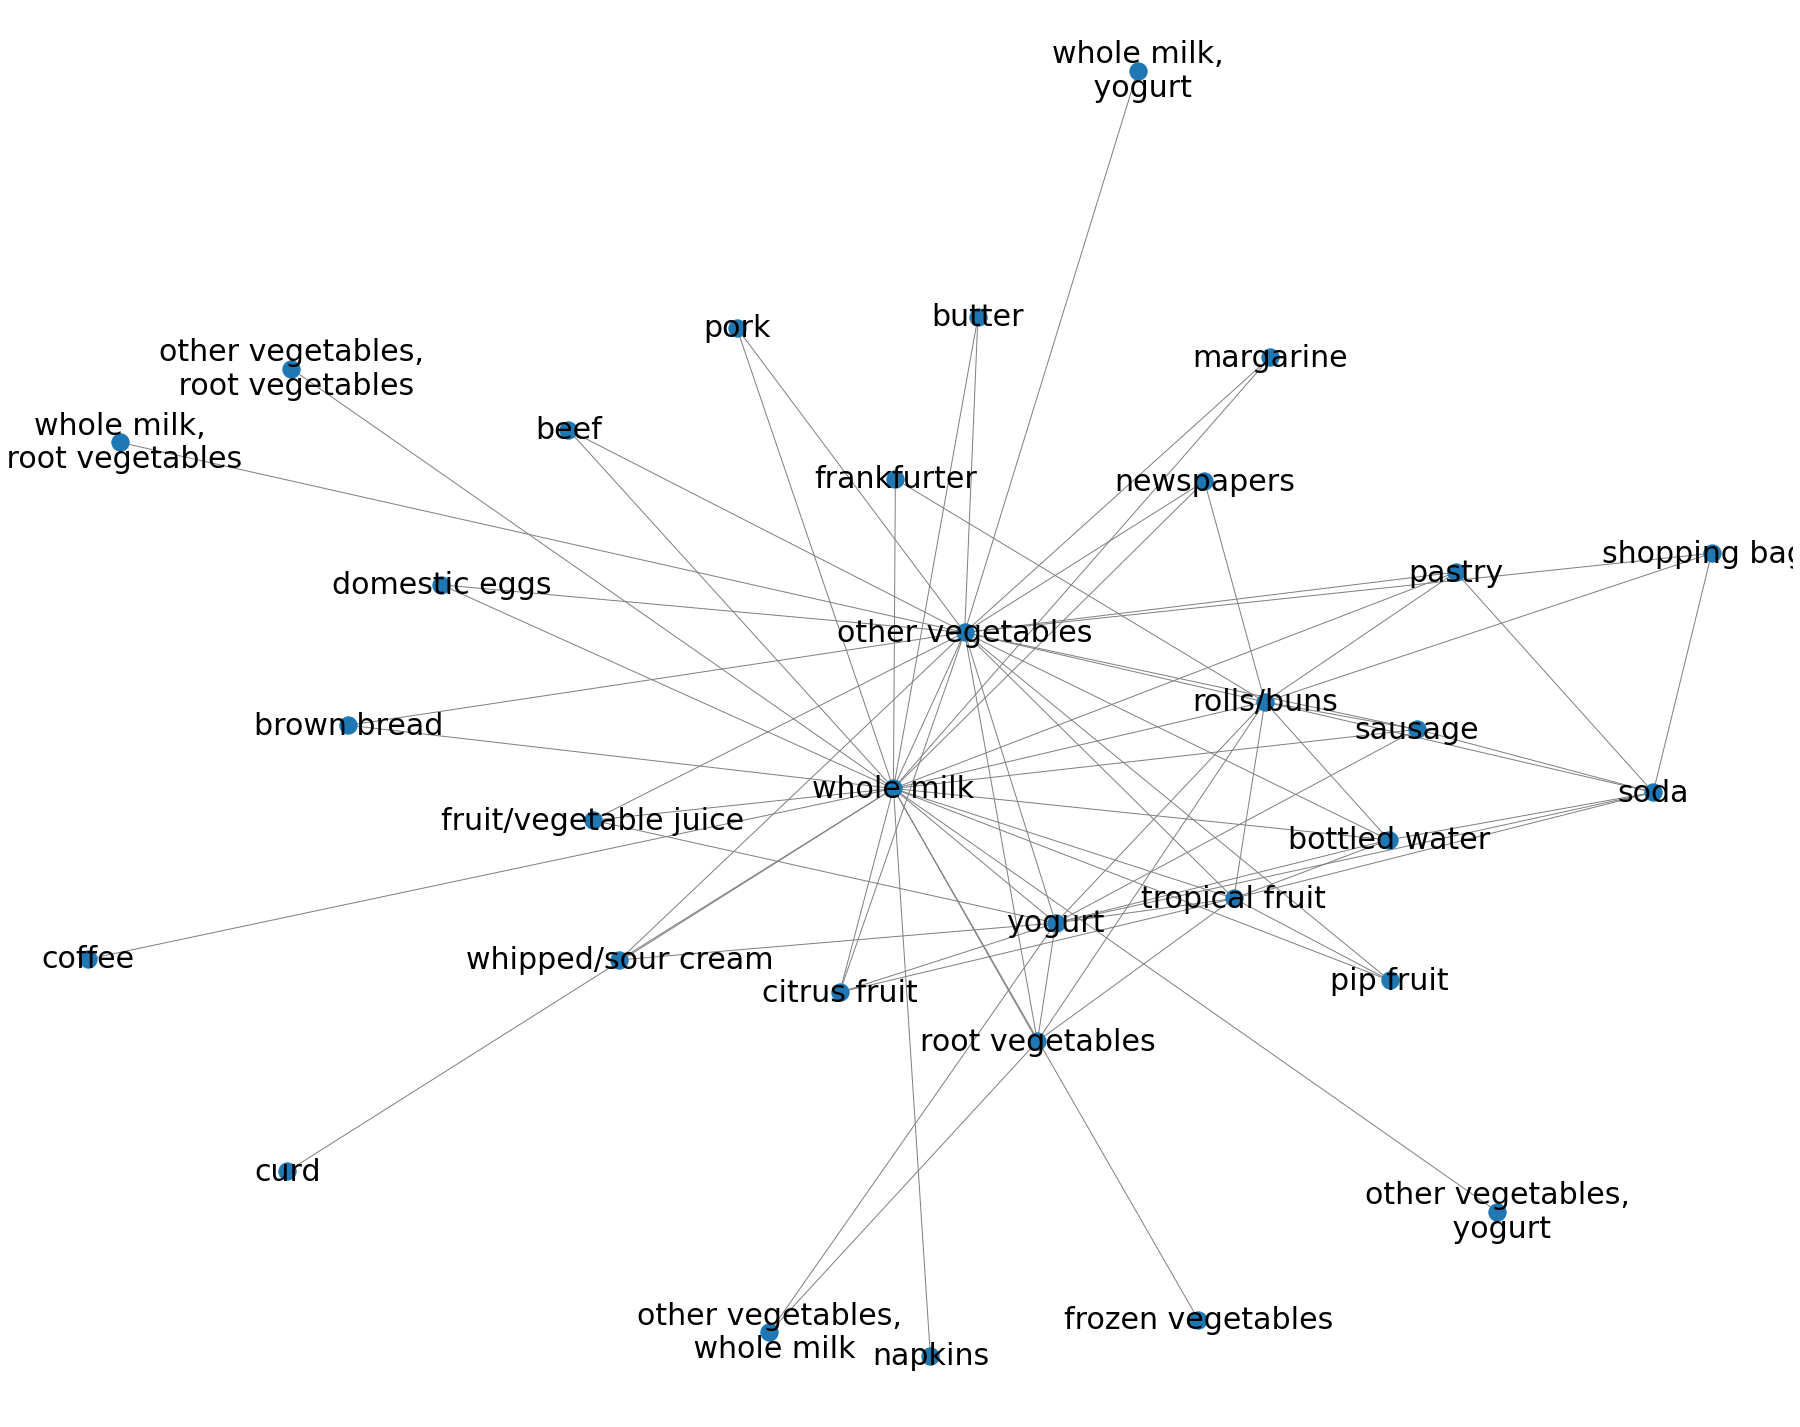

In [42]:
fig, ax= plt.subplots(figsize=(32,26))
GA = nx.from_pandas_edgelist(df_vis,source='antecedents',target='consequents')
nx.draw(GA, with_labels=True, font_size = 30, edge_color = 'gray')
plt.show()